In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [63]:
subs = pd.read_csv("/neurospin/dico/data/deep_folding/current/datasets/hcp/crops/2mm/CINGULATE/mask/Rskeleton_subject.csv")
subs_train_val = pd.read_csv("/neurospin/dico/data/deep_folding/current/datasets/hcp/crops/2mm/CINGULATE/mask/Rskeleton_subject_full.csv")

subs_train_val

,100206
0,100307
1,100408
2,100610
3,101006
4,101107
...,...
1108,992774
1109,993675
1110,994273
1111,995174


In [57]:
bdd = pd.read_csv("/neurospin/dico/agaudin/Runs/05_rigourous/Output/bdd_05.csv", index_col=0)
bdd = bdd.sort_values(by=['dataset_name', 'max_epochs'], ascending=True)
bdd

,model_path,auc,auc_std,accuracy,accuracy_std,backbone_name,dataset_name,foldlabel,max_angle,max_epochs,num_representation_features,train_val_csv_file,git_branch
3,/neurospin/dico/agaudin/Runs/05_rigourous/Outp...,0.765178,0.002214,0.714760,0.009040,convnet,cingulate_HCP_half_1,True,6,5,10,/neurospin/dico/data/deep_folding/papers/midl2...,Run_03_aymeric
4,/neurospin/dico/agaudin/Runs/05_rigourous/Outp...,0.724701,0.003540,0.669287,0.006510,convnet,cingulate_HCP_half_1,True,6,5,10,/neurospin/dico/data/deep_folding/papers/midl2...,Run_03_aymeric
68,/neurospin/dico/agaudin/Runs/05_rigourous/Outp...,0.735087,0.004577,0.685918,0.010806,convnet,cingulate_HCP_half_1,True,6,5,10,/neurospin/dico/data/deep_folding/papers/ipmi2...,Run_03_aymeric
2,/neurospin/dico/agaudin/Runs/05_rigourous/Outp...,0.753907,0.003286,0.705123,0.005322,convnet,cingulate_HCP_half_1,True,6,51,10,/neurospin/dico/data/deep_folding/papers/midl2...,Run_03_aymeric
5,/neurospin/dico/agaudin/Runs/05_rigourous/Outp...,0.704022,0.003958,0.645988,0.011568,convnet,cingulate_HCP_half_1,True,6,101,10,/neurospin/dico/data/deep_folding/papers/ipmi2...,Run_03_aymeric
...,...,...,...,...,...,...,...,...,...,...,...,...,...
61,/neurospin/dico/agaudin/Runs/05_rigourous/Outp...,0.773897,0.001731,0.708632,0.009618,convnet,cingulate_UkBioBank_most_folded_551,True,6,25,10,/neurospin/dico/agaudin/Runs/05_rigourous/2022...,Run_03_aymeric
43,/neurospin/dico/agaudin/Runs/05_rigourous/Outp...,0.755535,0.003918,0.717848,0.008275,convnet,cingulate_UkBioBank_most_folded_551,True,6,125,10,/neurospin/dico/agaudin/Runs/05_rigourous/2022...,Run_03_aymeric
59,/neurospin/dico/agaudin/Runs/05_rigourous/Outp...,0.756026,0.003511,0.729404,0.005795,convnet,cingulate_UkBioBank_most_folded_551,True,6,125,10,/neurospin/dico/agaudin/Runs/05_rigourous/2022...,Run_03_aymeric
7,/neurospin/dico/agaudin/Runs/05_rigourous/Outp...,0.720853,0.004433,0.733076,0.006793,convnet,cingulate_UkBioBank_most_folded_551,True,6,251,10,/neurospin/dico/agaudin/Runs/05_rigourous/2022...,Run_03_aymeric


max_epochs
1       7
5      12
25      5
125     2
251     1
Name: auc, dtype: int64


max_epochs
1      0.643889
5      0.699301
25     0.684526
125    0.675623
251    0.648460
Name: auc, dtype: float64

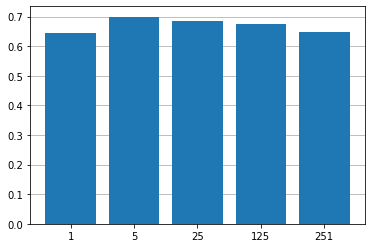

In [59]:
# least folded brains
filtered_bdd = bdd[bdd.dataset_name == 'cingulate_UkBioBank_least_folded_551']

means = filtered_bdd.groupby('max_epochs').mean().auc
n = means.shape[0]

counts = filtered_bdd.groupby('max_epochs').count().auc
print(counts)

fig, ax = plt.subplots()

plt.grid(axis='y')
ax.set_axisbelow(True)
plt.bar(range(n), means)
plt.xticks(range(n), filtered_bdd.max_epochs.unique())
plt.plot()

means

max_epochs
1      9
5      8
25     5
125    2
251    2
Name: auc, dtype: int64


max_epochs
1      0.605755
5      0.754086
25     0.738696
125    0.755780
251    0.733955
Name: auc, dtype: float64

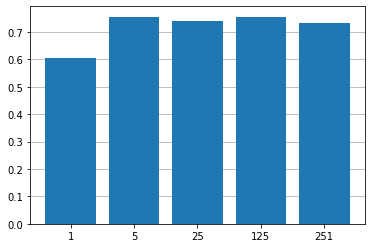

In [60]:
# most folded brains
filtered_bdd = bdd[bdd.dataset_name == 'cingulate_UkBioBank_most_folded_551']

means = filtered_bdd.groupby('max_epochs').mean().auc
n = means.shape[0]

counts = filtered_bdd.groupby('max_epochs').count().auc
print(counts)

fig, ax = plt.subplots()

plt.grid(axis='y')
ax.set_axisbelow(True)
plt.bar(range(n), means)
plt.xticks(range(n), filtered_bdd.max_epochs.unique())
plt.plot()

means